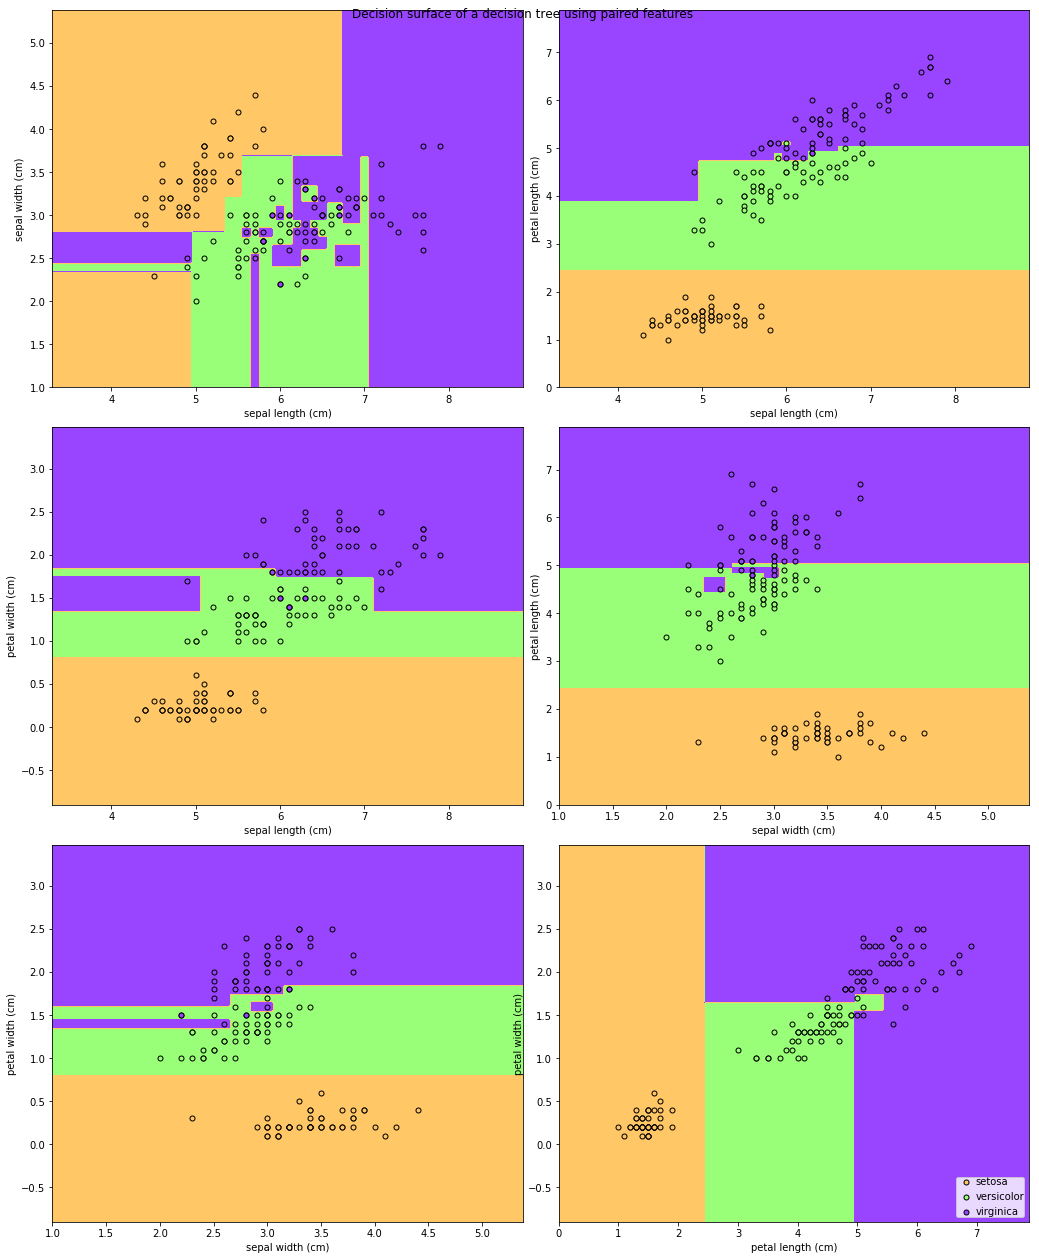

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz # conda install python-graphviz

# Зададим параметры
n_classes = 3
point_colors = ((1.00,0.78,0.40), (0.60,1.00,0.47), (0.60,0.27,1.00)) # оранжевое, зеленое, фиолетовое
plot_colors = (point_colors[0], point_colors[0], point_colors[2], point_colors[1], point_colors[1])
plot_step = 0.02

# Загрузим данные
iris = load_iris()

plt.figure(1, figsize=(15, 18))

# Цикл по всем возможным парам признаков
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # Берем признаки попарно
    X = iris.data[:, pair]
    y = iris.target

    # Создаем модель: экземпляр дерева решений, и сразу же обчаем. Получаем обученную модель в переменной clf
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Формируем поле вывода и определяем граничные значения
    plt.subplot(3, 2, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Создаем сетку значений
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    # Выполняем предсказания на сетке значений и строим по ним диаграмму
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, colors=plot_colors)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Строим точки из обучающей выборки
    for i, color in zip(range(n_classes), point_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolor='black', s=25)
        
    # Используем модуль graphviz, чтобы вывести дерево решений в виде графа
    dot_data = tree.export_graphviz(decision_tree = clf, 
                                    out_file      = None, 
                                    feature_names = [iris.feature_names[pair[0]], iris.feature_names[pair[1]]],
                                    class_names   = ['Iris setosa', 'Iris versicolor', 'Iris virginica'],
                                    filled         = True)
    graph = graphviz.Source(dot_data) 
    #graph.render("iris_{}".format(pairidx)) # Сохранение iris_<pairidx>.png и самого дерева (без расширения)
    #graph.view() # Вывод графа на экран. 
    # Если не использовать следующую строку кода, то будут выведены сразу все графы
    #input("Нажмите Enter, чтобы продолжить")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

